In [1]:
import pandas as pd
import numpy as np
import cv2

In [2]:
df = pd.read_csv('./GroundTruth.csv')
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def wavelet_features(x):
    path = '/home/rajdeep/projects/image_segmentation/data/archive/images/'
    img = cv2.imread(path+x['Image'].values[0]+'.jpg')
    
    return x

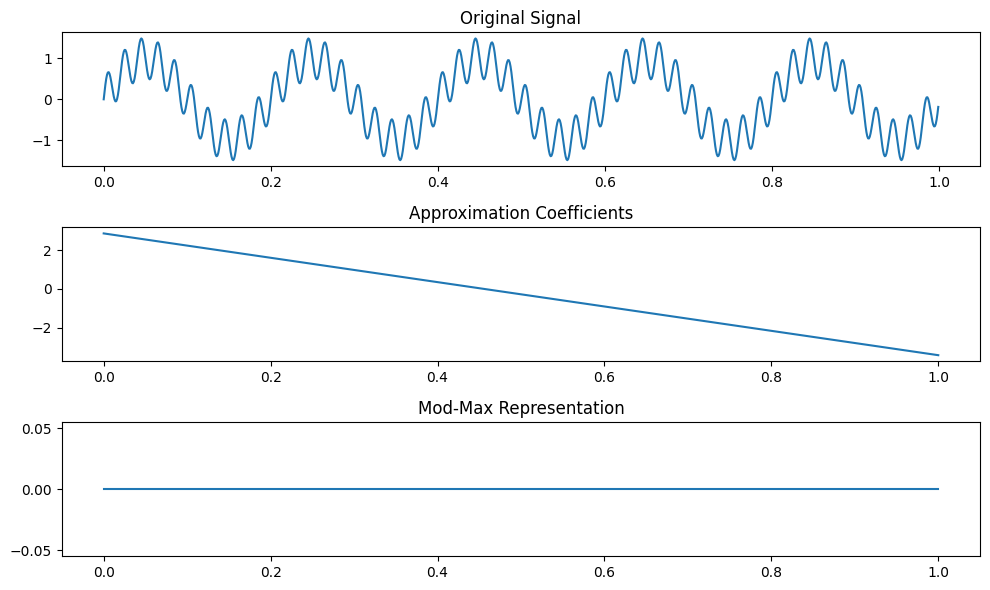

In [4]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a sample signal (you can replace this with your data)
sampling_rate = 1000
t = np.arange(0, 1, 1/sampling_rate)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)

# Apply the Discrete Wavelet Transform (DWT)
wavelet = 'haar'  # Choose a wavelet (e.g., 'haar', 'db2', 'sym5', etc.)
coeffs = pywt.wavedec(signal, wavelet)

# Get the local maxima and minima of the approximation coefficients
approx_coeffs = coeffs[0]
local_maxima_indices = np.where((approx_coeffs[1:-1] > approx_coeffs[:-2]) & (approx_coeffs[1:-1] > approx_coeffs[2:]))[0] + 1
local_minima_indices = np.where((approx_coeffs[1:-1] < approx_coeffs[:-2]) & (approx_coeffs[1:-1] < approx_coeffs[2:]))[0] + 1

# Create the mod-max representation
mod_max = np.zeros_like(approx_coeffs)
mod_max[local_maxima_indices] = 1
mod_max[local_minima_indices] = -1

# Display the mod-max representation
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(t, signal)
plt.title('Original Signal')

plt.subplot(312)
plt.plot(approx_coeffs)
plt.title('Approximation Coefficients')

plt.subplot(313)
plt.plot(mod_max)
plt.title('Mod-Max Representation')
plt.tight_layout()
plt.show()